In [273]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Context

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

### Objective

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

### Define the problem and perform Exploratory Data Analysis
- Read the data as an appropriate time series data - Plot the data - Perform EDA - Perform Decomposition

In [274]:
df_1 = pd.read_csv("Rose.csv",parse_dates=True,index_col=0)

In [275]:
df_1.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [276]:
df_1.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


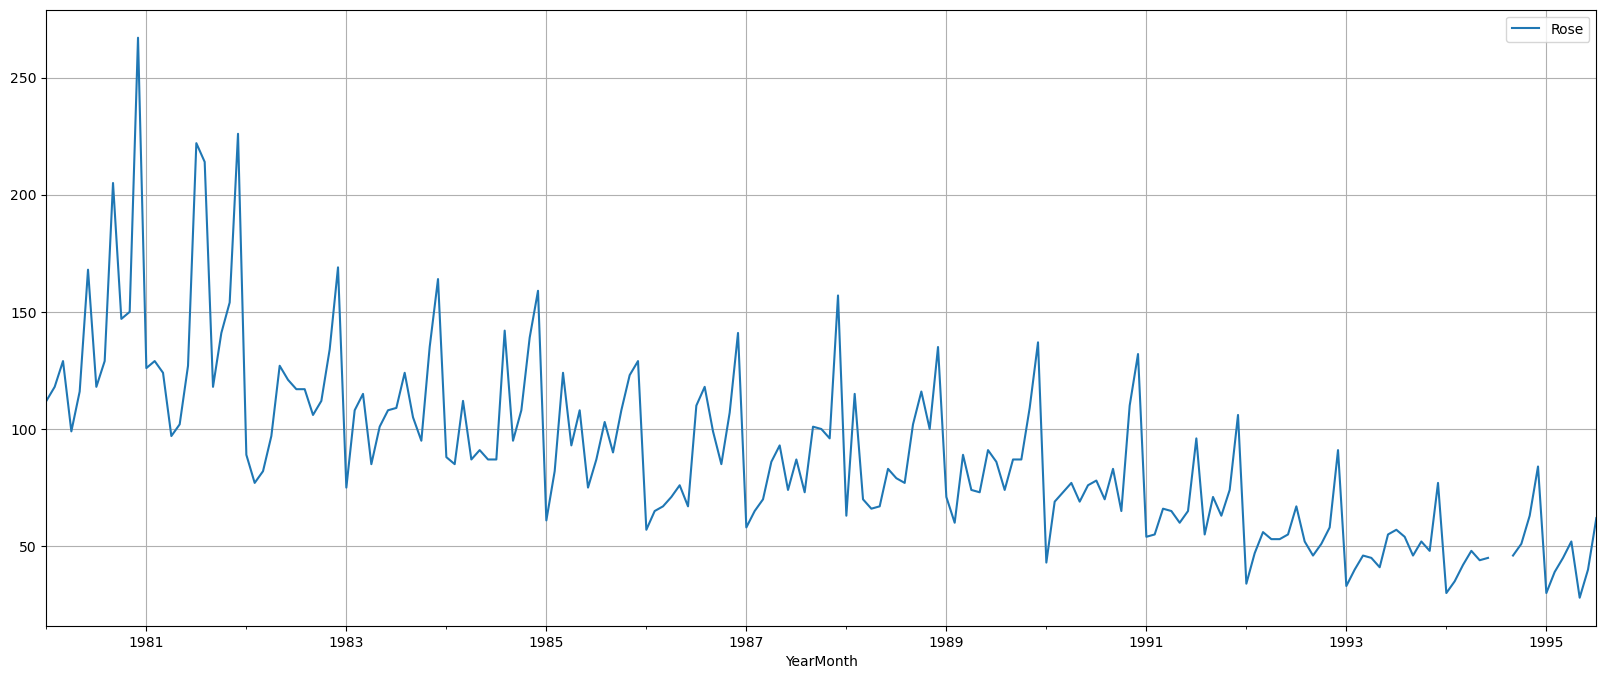

In [277]:
df_1.plot(figsize=(20,8))
plt.grid();

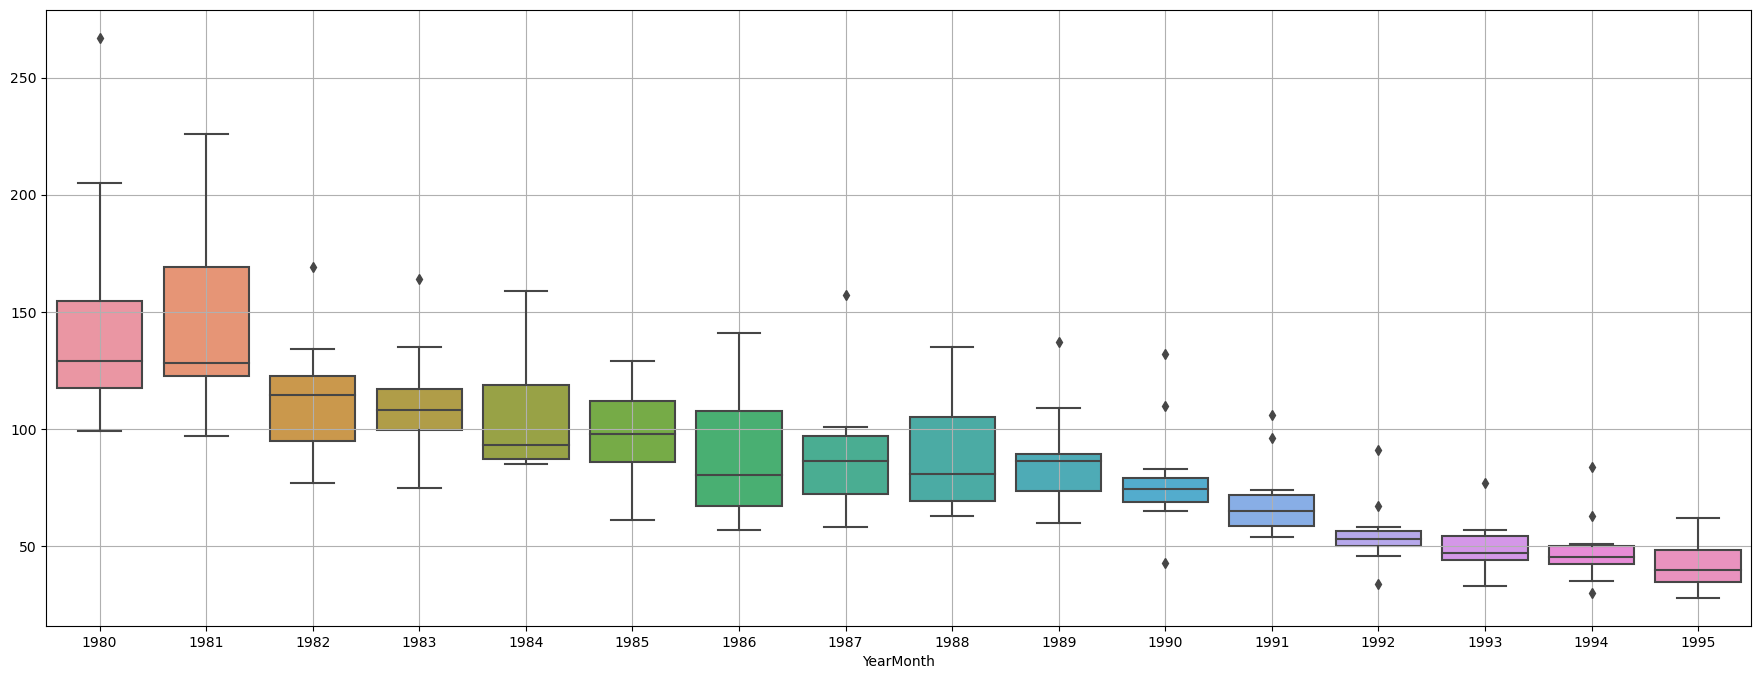

In [278]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_1.index.year,y = df_1.values[:,0],ax=ax)
plt.grid();

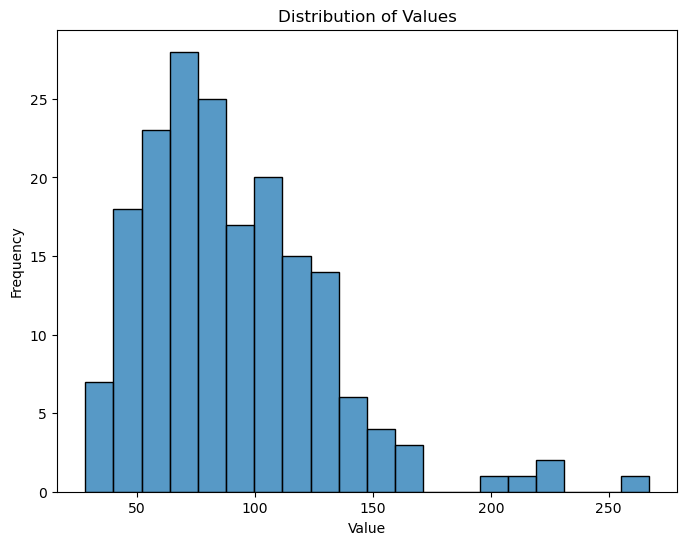

In [279]:
# Visualize data distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_1['Rose'], bins=20) # Changed from df_1['value'] to df_1['Rose']
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [280]:
print(df_1.describe())

print(df_1.info())

             Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
None


In [281]:
date = pd.date_range(start='1/1/1980', end='1/7/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-03-31', '1994-04-30', '1994-05-31', '1994-06-30',
               '1994-07-31', '1994-08-31', '1994-09-30', '1994-10-31',
               '1994-11-30', '1994-12-31'],
              dtype='datetime64[ns]', length=180, freq='M')

In [282]:
# Check for missing values
print(df_1.isnull().sum())

Rose    2
dtype: int64


Plot a monthplot of the give Time Series.

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


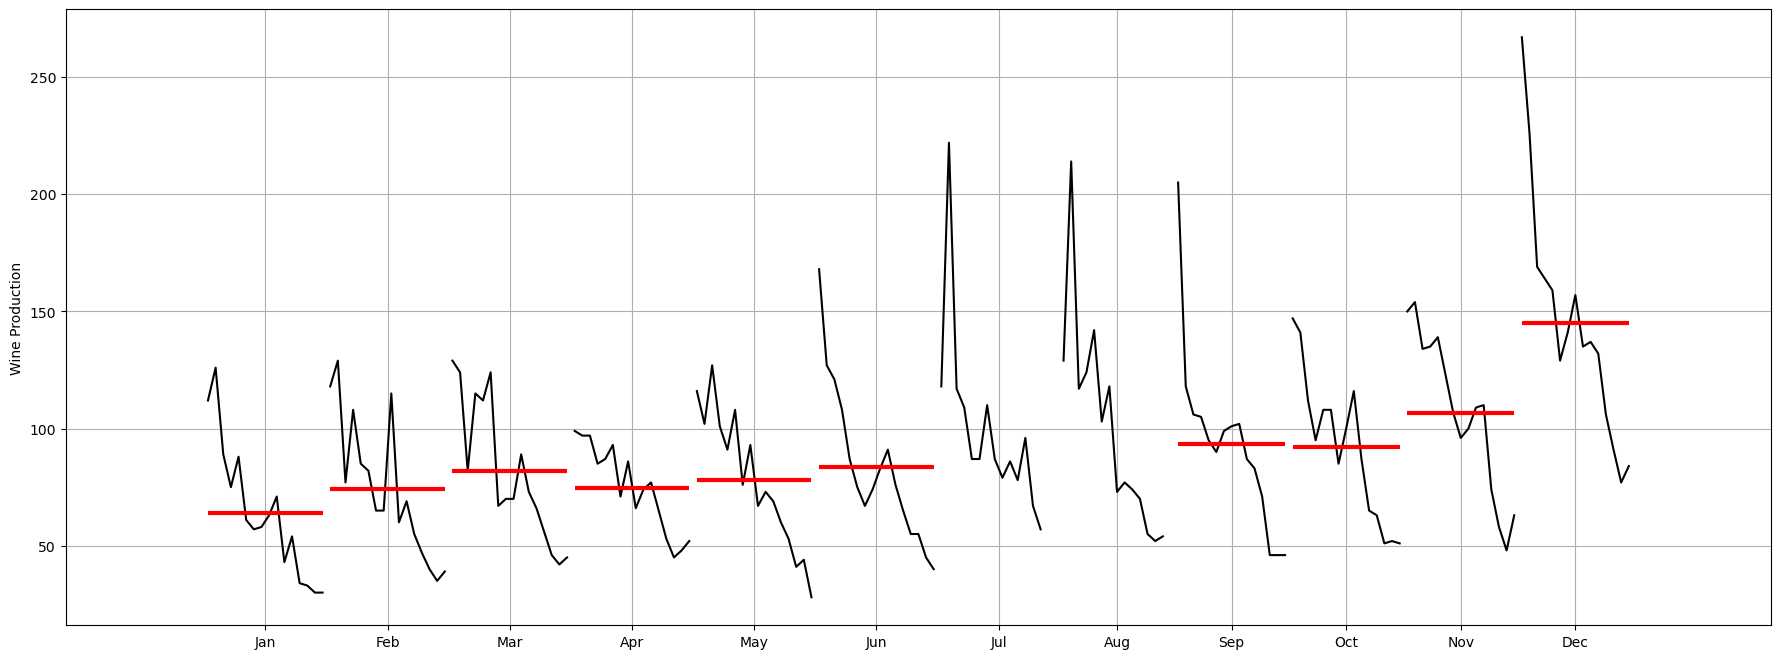

In [283]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Wine Production',ax=ax)
plt.grid();

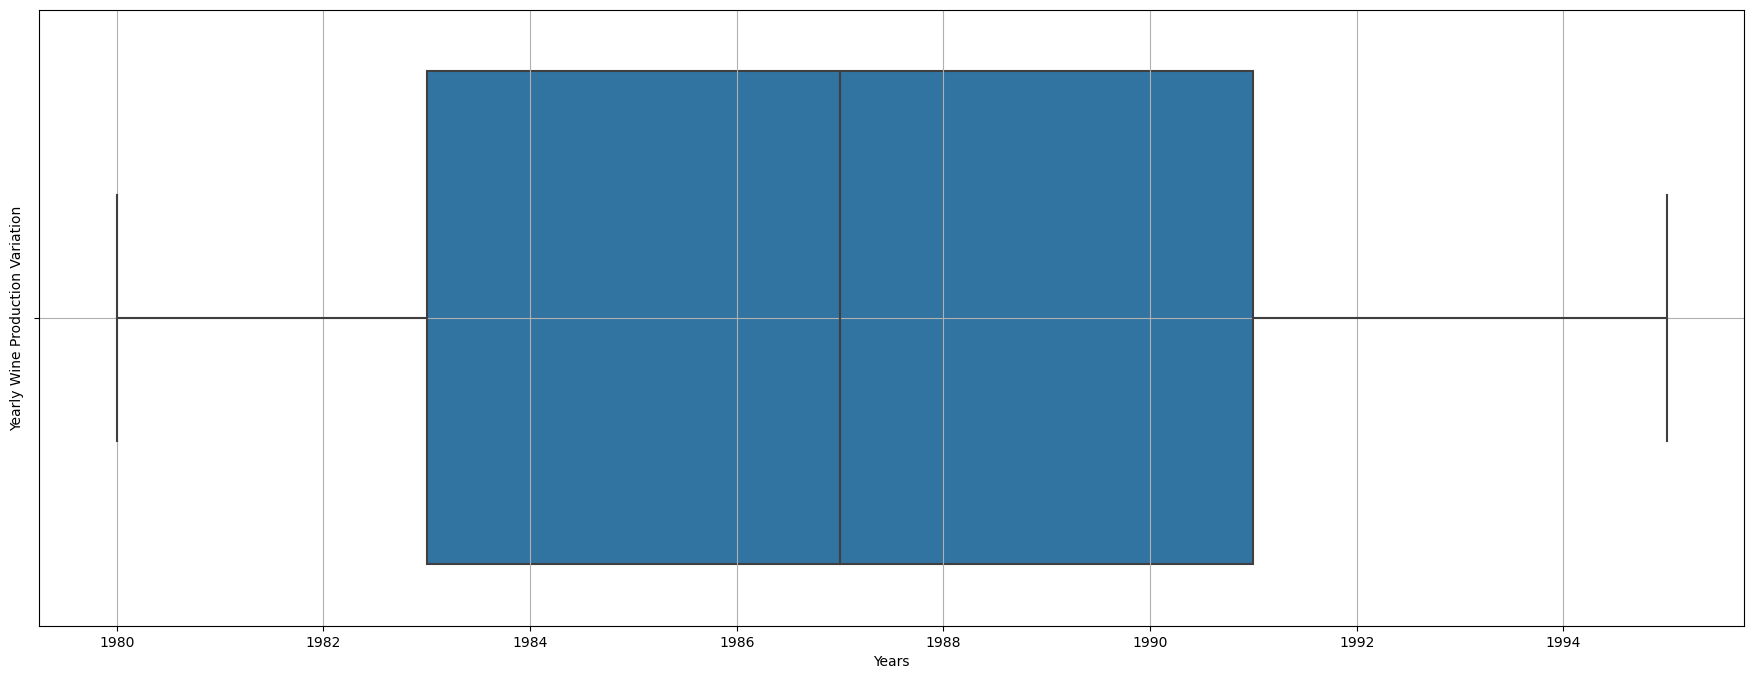

In [284]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df_1.index.year, data=df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Production Variation');

A decreasing Trend could be observed with a multiplicative seasonality present.
The Null values could be observed as a break in the plot for the observed timestamps.

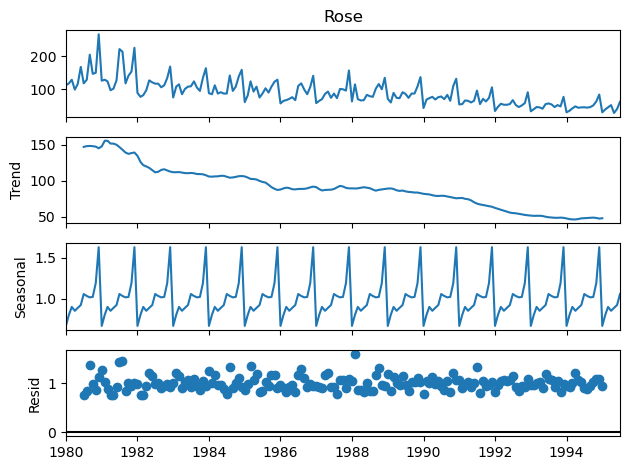

In [285]:
import matplotlib.pyplot as plt
# Handle missing values using polynomial interpolation
df_1['Rose'].interpolate(method='polynomial', order=2, inplace=True)  
# Perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_1['Rose'], model='multiplicative') 
result.plot()
plt.show()

- Train-test split

In [286]:
train    =   df_1[0:int(len(df_1)*0.7)] 
test     =   df_1[int(len(df_1)*0.7):]

In [287]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [288]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data 
             Rose
YearMonth       
1990-06-01  76.0
1990-07-01  78.0
1990-08-01  70.0
1990-09-01  83.0
1990-10-01  65.0 

First few rows of Test Data 
              Rose
YearMonth        
1990-11-01  110.0
1990-12-01  132.0
1991-01-01   54.0
1991-02-01   55.0
1991-03-01   66.0 

Last few rows of Test Data 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



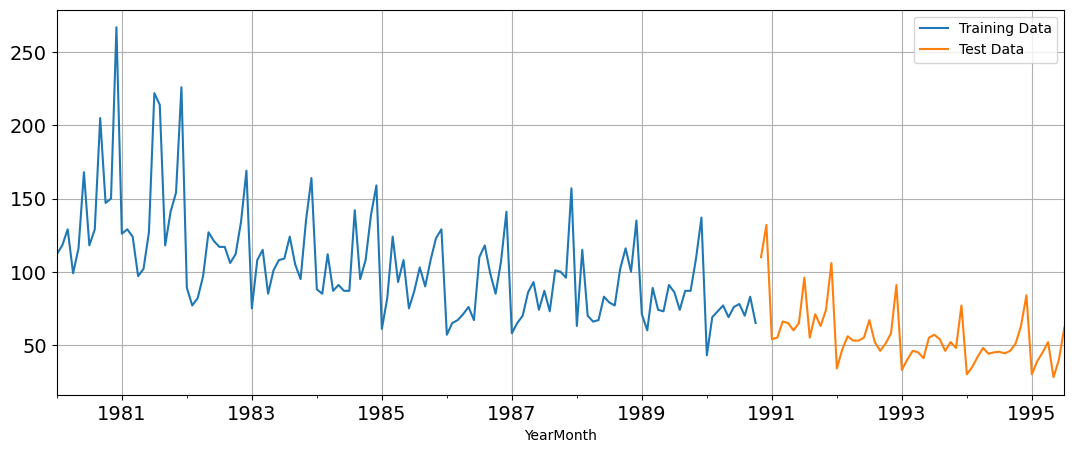

In [289]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Model Building - Original Data
- Build forecasting models - Linear regression - Simple Average - Moving Average - Exponential Models (Single, Double, Triple) - Check the performance of the models built

Model 1: Linear Regression

In [290]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [291]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [292]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
             Rose  time
YearMonth             
1990-06-01  76.0   126
1990-07-01  78.0   127
1990-08-01  70.0   128
1990-09-01  83.0   129
1990-10-01  65.0   130 

First few rows of Test Data 
              Rose  time
YearMonth              
1990-11-01  110.0   131
1990-12-01  132.0   132
1991-01-01   54.0   133
1991-02-01   55.0   134
1991-03-01   66.0   135 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [293]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

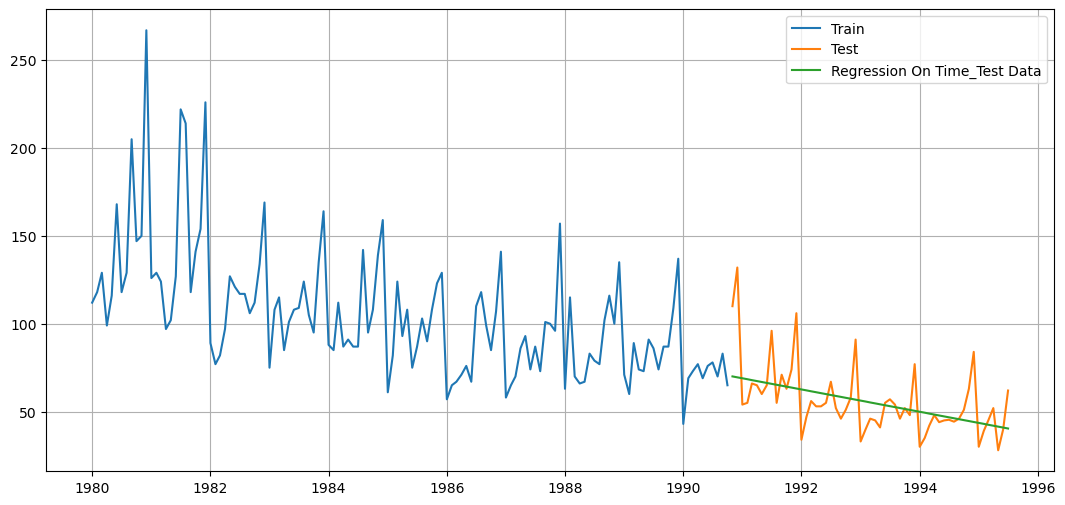

In [294]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

Defining the accuracy metrics.

In [295]:
from sklearn import metrics

Model Evaluation

In [296]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.36


In [297]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,17.357497


Method 2: Moving Average(MA)

In [298]:
MovingAverage = df_1.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Trailing moving averages

In [299]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


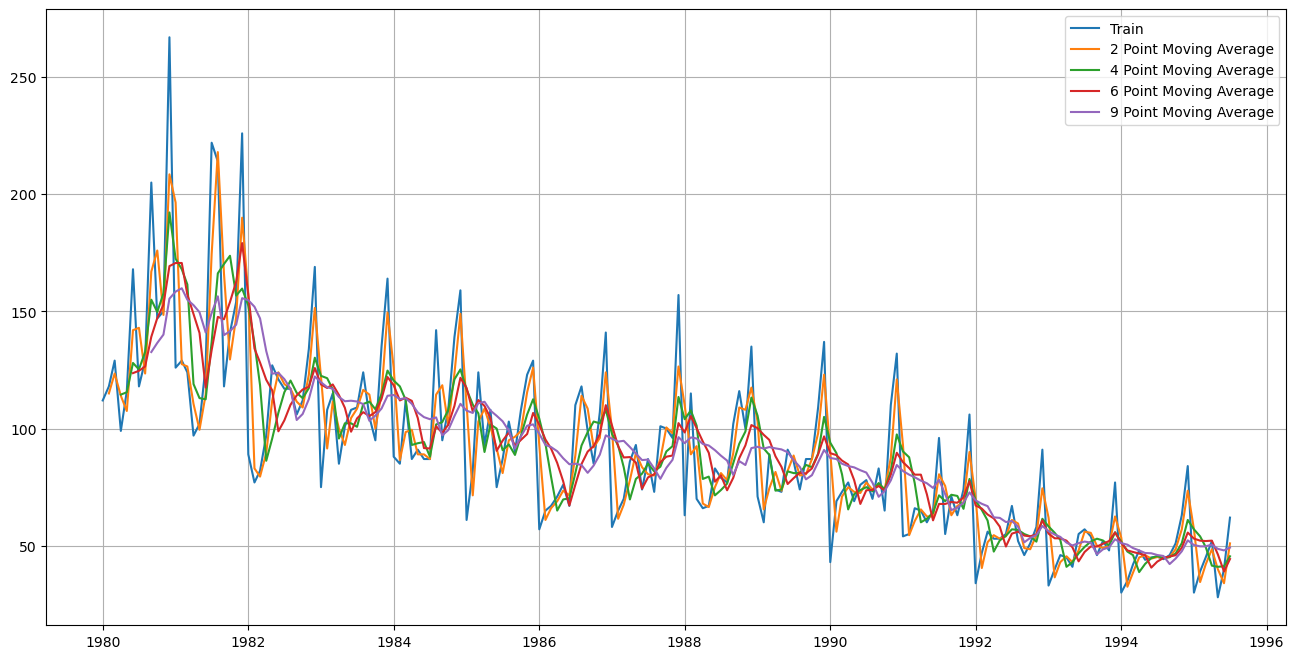

In [300]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [301]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

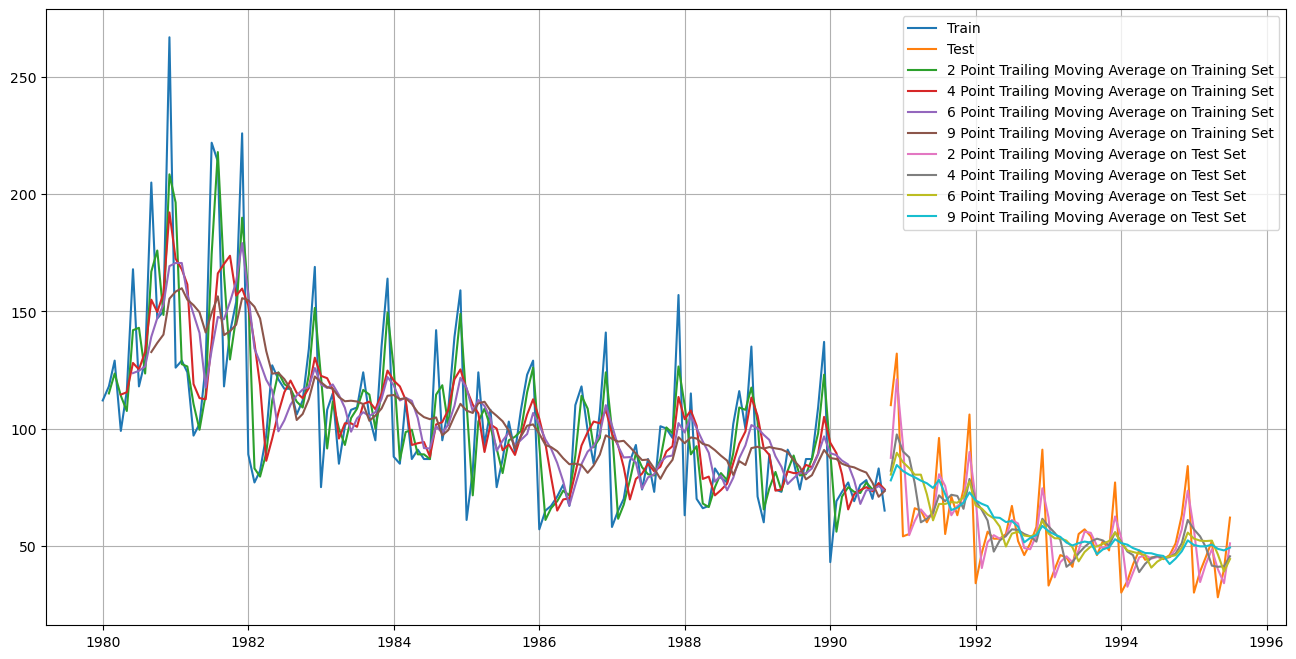

In [302]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

RMSE Calculation as below

In [303]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.802
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.374
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.868
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.347 


In [304]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,17.357497
2pointTrailingMovingAverage,11.801775
4pointTrailingMovingAverage,15.373563
6pointTrailingMovingAverage,15.868241
9pointTrailingMovingAverage,16.346517


### Method 3: Simple Exponential Smoothing

In [305]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [306]:
SES_train = train.copy()
SES_test = test.copy()

In [307]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [308]:
model_SES_autofit = model_SES.fit(optimized=True)

In [309]:
model_SES_autofit.params

{'smoothing_level': 0.12777740886936442,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [310]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
YearMonth,,
1990-11-01,110.0,77.599284
1990-12-01,132.0,77.599284
1991-01-01,54.0,77.599284
1991-02-01,55.0,77.599284
1991-03-01,66.0,77.599284


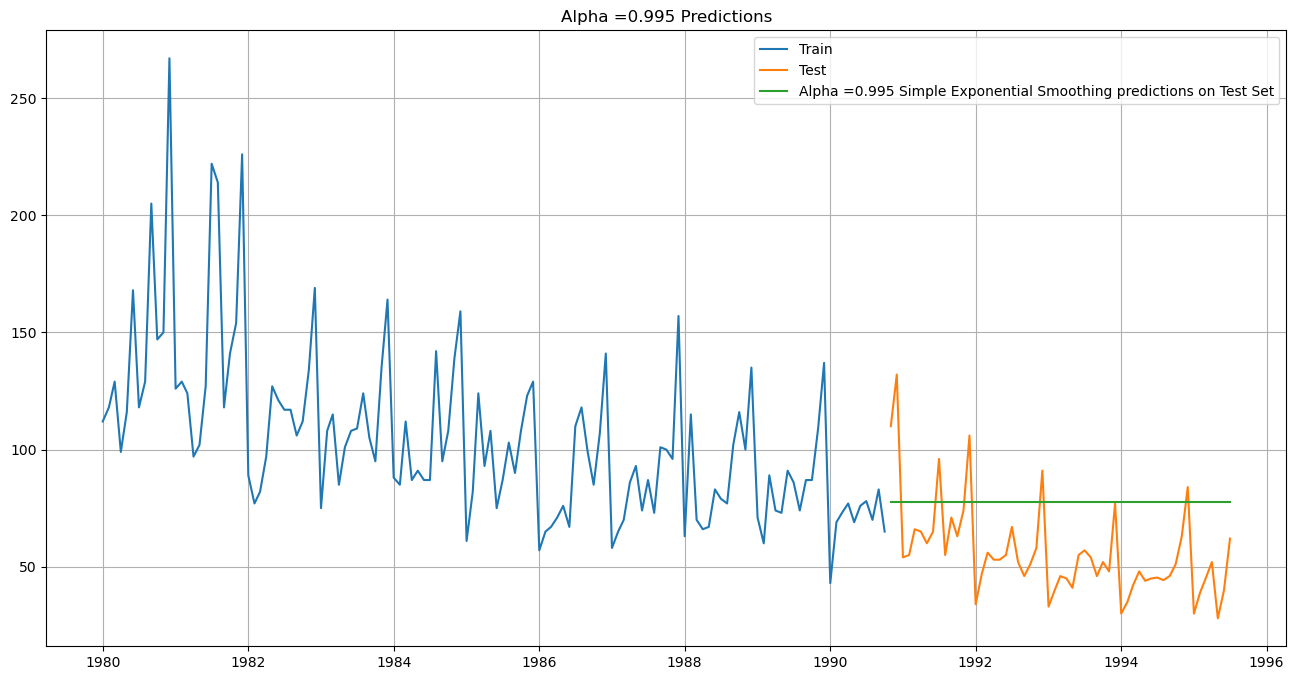

In [311]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

Model Evaluation for  𝛼
  = 0.995 : Simple Exponential Smoothing

In [312]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 29.250


In [313]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,17.357497
2pointTrailingMovingAverage,11.801775
4pointTrailingMovingAverage,15.373563
6pointTrailingMovingAverage,15.868241
9pointTrailingMovingAverage,16.346517
"Alpha=0.995,SimpleExponentialSmoothing",29.250243


### Method 4: Double Exponential Smoothing (Holt's Model)

In [314]:
DES_train = train.copy()
DES_test = test.copy()

In [315]:
model_DES = Holt(DES_train['Rose'])

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [316]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [317]:
results_list = [] # create an empty list to store the results
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test['Rose']))
        
        rmse_DES_train = np.round(metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False),2) # use the mean_squared_error function from the metrics module

        rmse_DES_test = np.round(metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False),2)

        results_list.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train, 'Test RMSE':rmse_DES_test}) # append the results to the list

resultsDf_7 = pd.DataFrame(results_list)

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1203345811.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1203345811.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test['Rose']))


In [318]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.25,17.68
1,0.1,0.2,33.16,29.59
2,0.1,0.3,32.85,30.26
3,0.1,0.4,32.95,39.64
4,0.1,0.5,33.36,49.70
...,...,...,...,...
95,1.0,0.6,52.02,264.82
96,1.0,0.7,54.70,331.59
97,1.0,0.8,57.58,406.47
98,1.0,0.9,60.69,491.21


In [319]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.25,17.68
16,0.2,0.7,40.35,17.74
23,0.3,0.4,37.29,18.34
36,0.4,0.7,40.74,18.99
33,0.4,0.4,37.99,19.15


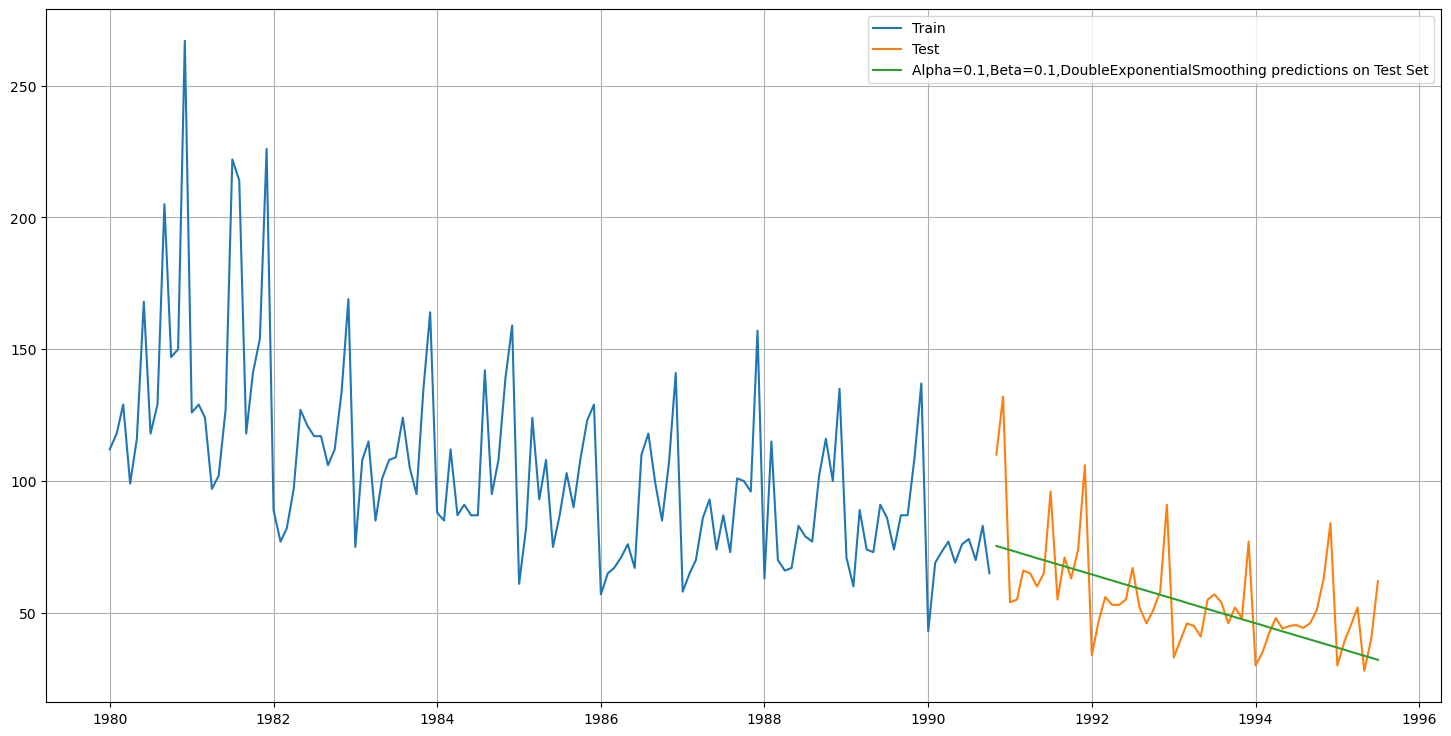

In [320]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [321]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,17.357497
2pointTrailingMovingAverage,11.801775
4pointTrailingMovingAverage,15.373563
6pointTrailingMovingAverage,15.868241
9pointTrailingMovingAverage,16.346517
"Alpha=0.995,SimpleExponentialSmoothing",29.250243
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",17.680000


### Method 5: Triple Exponential Smoothing (Holt - Winter's Model)

In [322]:
TES_train = train.copy()
TES_test = test.copy()

In [323]:
model_TES= ExponentialSmoothing(TES_train['Rose'],trend='add',seasonal='multiplicative')


C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [324]:
model_TES_autofit = model_TES.fit()

In [325]:
model_TES_autofit.params

{'smoothing_level': 0.10169520380955438,
 'smoothing_trend': 0.0007058642829212204,
 'smoothing_seasonal': 1.2230189753146669e-05,
 'damping_trend': nan,
 'initial_level': 127.00110122061433,
 'initial_trend': -0.5130818887786344,
 'initial_seasons': array([0.86329436, 0.9758005 , 1.06696094, 0.93565741, 1.05039692,
        1.13162774, 1.24587724, 1.33247998, 1.24729237, 1.22701271,
        1.41107894, 1.94589043]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [326]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1990-11-01,110.0,86.341086
1990-12-01,132.0,118.068900
1991-01-01,54.0,51.939367
1991-02-01,55.0,58.209268
1991-03-01,66.0,63.101160


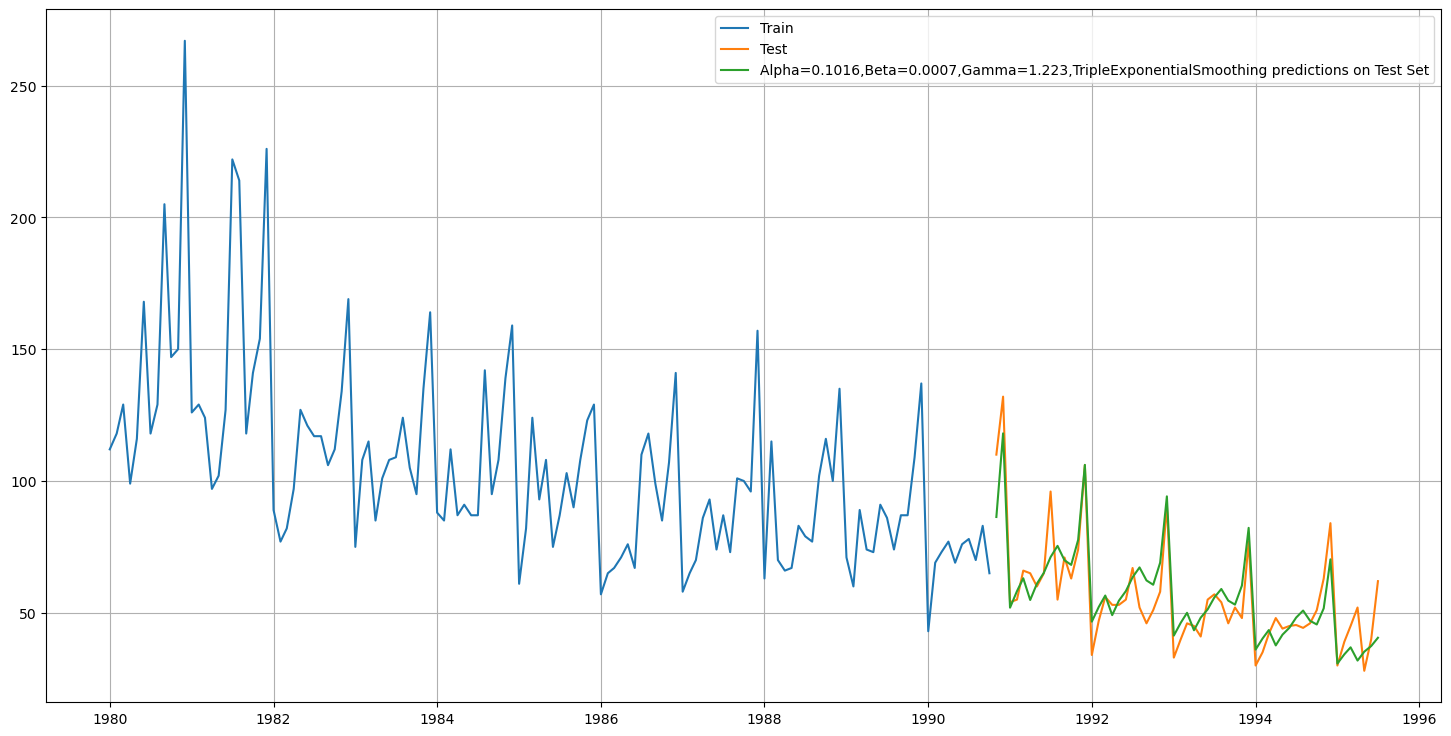

In [327]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.1016,Beta=0.0007,Gamma=1.223,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [328]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.1016,Beta=0.0007,Gamma=1.223, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.1016,Beta=0.0007,Gamma=1.223, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 9.338


In [329]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.1016,Beta=0.0007,Gamma=1.223,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,17.357497
2pointTrailingMovingAverage,11.801775
4pointTrailingMovingAverage,15.373563
6pointTrailingMovingAverage,15.868241
9pointTrailingMovingAverage,16.346517
"Alpha=0.995,SimpleExponentialSmoothing",29.250243
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",17.680000
"Alpha=0.1016,Beta=0.0007,Gamma=1.223,TripleExponentialSmoothing",9.337808


In [330]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [331]:
results_list1 = []
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
        
            rmse_model8_train = np.round(metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False),2)
            
            rmse_model8_test = np.round(metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False),2)
            
            results_list1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test})
                                        
            
resultsDf_8_2 = pd.DataFrame(results_list1)

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\u411715\AppData\Local\Temp\ipykernel_31712\1569319523.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

In [332]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
91,0.1,1.0,0.2,23.14,9.13
4,0.1,0.1,0.5,22.42,9.20
5,0.1,0.1,0.6,23.40,9.27
3,0.1,0.1,0.4,21.55,9.28
106,0.2,0.1,0.7,25.62,9.32


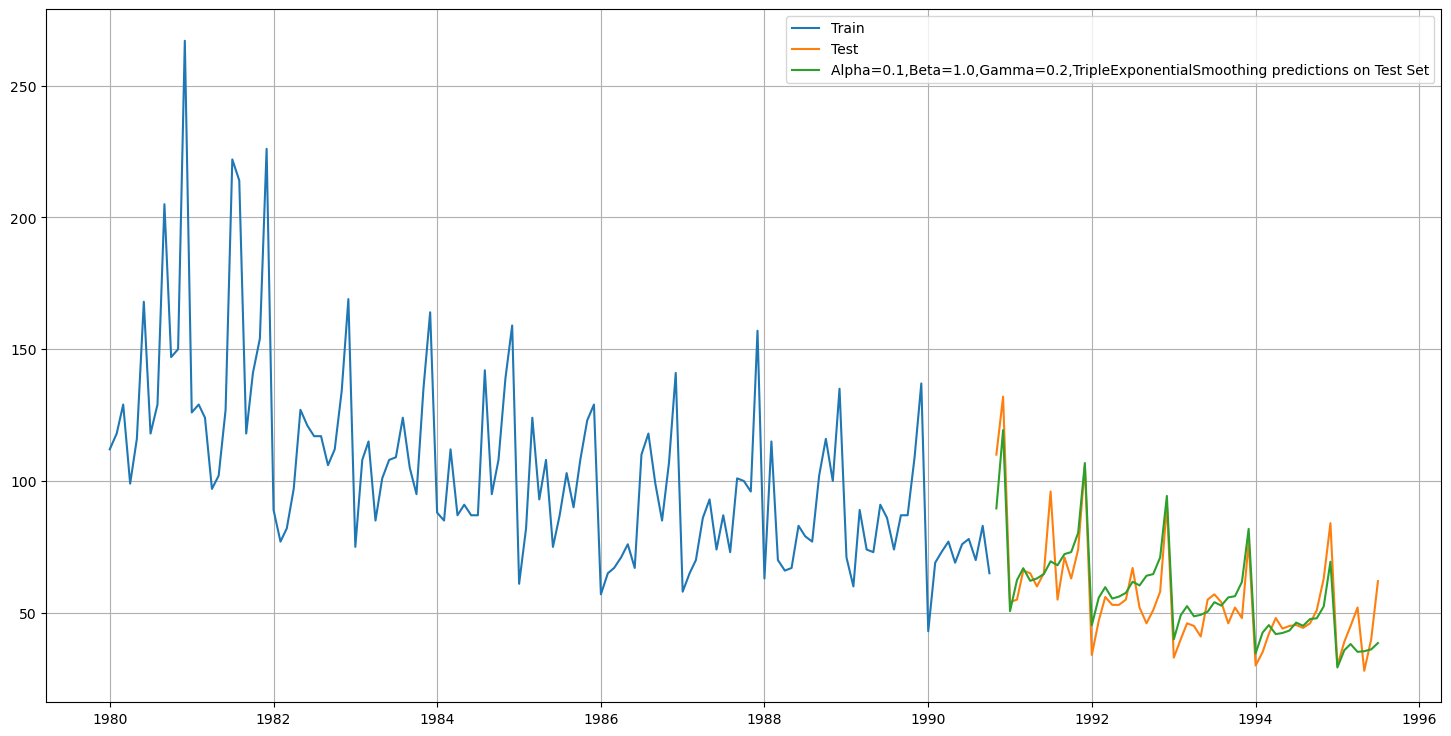

In [333]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1,1.0, 0.2], label='Alpha=0.1,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [334]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,17.357497
2pointTrailingMovingAverage,11.801775
4pointTrailingMovingAverage,15.373563
6pointTrailingMovingAverage,15.868241
9pointTrailingMovingAverage,16.346517
"Alpha=0.995,SimpleExponentialSmoothing",29.250243
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",17.680000
"Alpha=0.1016,Beta=0.0007,Gamma=1.223,TripleExponentialSmoothing",9.337808
"Alpha=0.1,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing",9.130000


### Check for stationarity of the whole Time Series data.

In [335]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

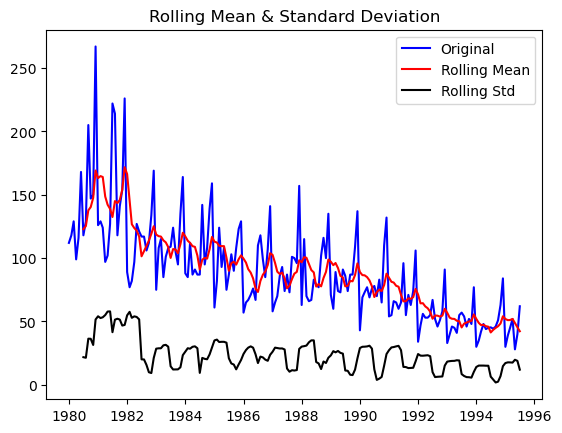

Results of Dickey-Fuller Test:
Test Statistic                  -1.872615
p-value                          0.345051
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [336]:
test_stationarity(df_1['Rose'])

We see that at 5% significant level the Time Series is non-stationary.Let us take a difference of order 1 and check whether the Time Series is stationary or not.

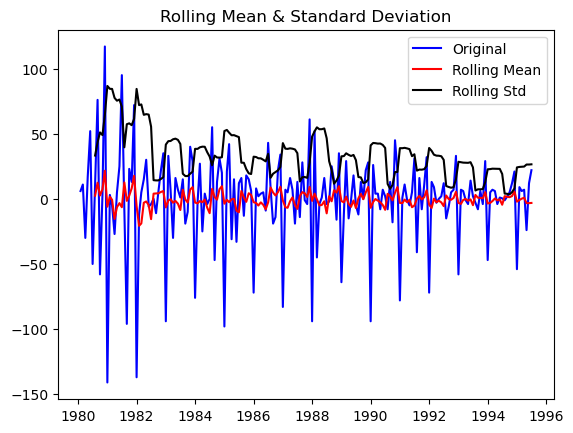

Results of Dickey-Fuller Test:
Test Statistic                -8.044081e+00
p-value                        1.814191e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [337]:
test_stationarity(df_1['Rose'].diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

Model Building - Stationary Data
- Generate ACF & PACF Plot and find the AR, MA values. - Build different ARIMA models - Auto ARIMA - Manual ARIMA - Build different SARIMA models - Auto SARIMA - Manual SARIMA - Check the performance of the models built

Plot the Autocorrelation function plots on the whole data.

In [338]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

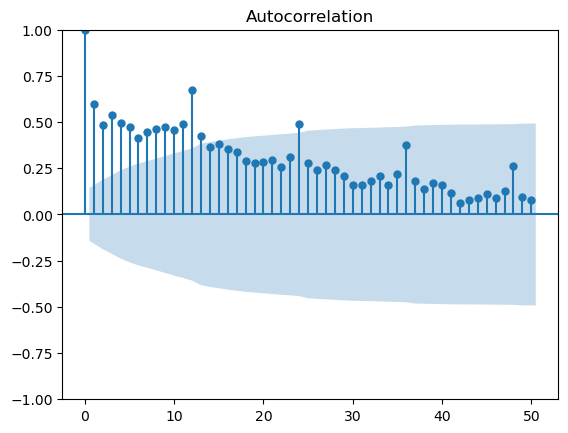

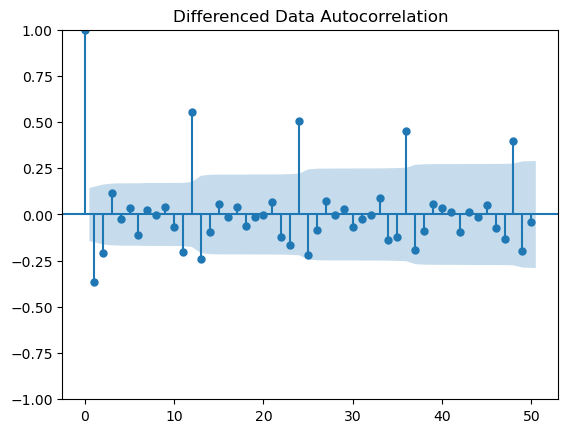

In [339]:
plot_acf(df_1['Rose'],lags=50)
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

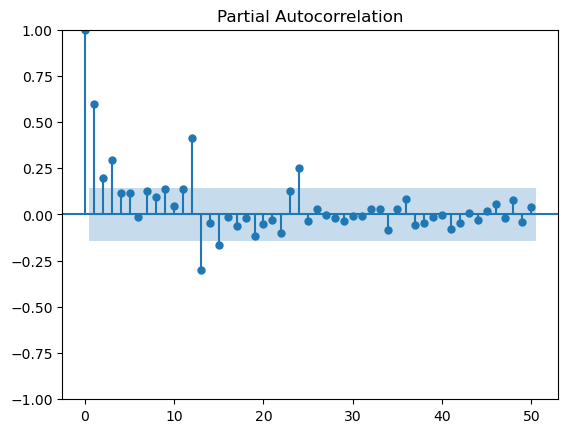

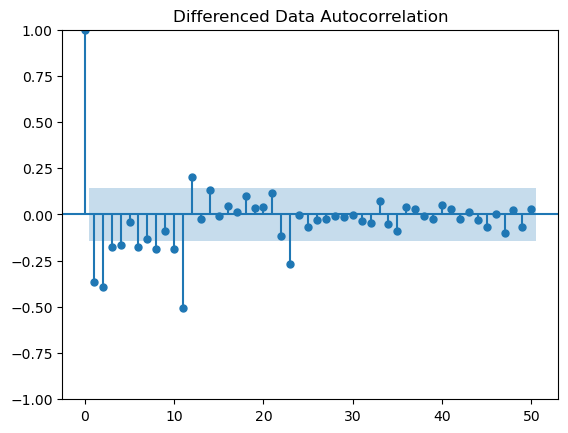

In [340]:
plot_pacf(df_1['Rose'],lags=50)
plot_pacf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

## Build an Automated version of an <font color='blue'>ARMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [341]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we necessary for an ARMA model 

import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [342]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [343]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = pd.concat([ARMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARMA_model.aic]})], ignore_index=True)

ARIMA(0, 0, 0) - AIC:1306.2886900845197
ARIMA(0, 0, 1) - AIC:1287.093068069193
ARIMA(0, 0, 2) - AIC:1288.116815604008
ARIMA(1, 0, 0) - AIC:1282.8842432626589
ARIMA(1, 0, 1) - AIC:1273.9696715609634
ARIMA(1, 0, 2) - AIC:1272.008960561638
ARIMA(2, 0, 0) - AIC:1283.4621278738264


C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) - AIC:1272.7845600920732
ARIMA(2, 0, 2) - AIC:1272.2305289576561


In [344]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
5,"(1, 0, 2)",1272.008961
8,"(2, 0, 2)",1272.230529
7,"(2, 0, 1)",1272.784560
4,"(1, 0, 1)",1273.969672
3,"(1, 0, 0)",1282.884243
6,"(2, 0, 0)",1283.462128
1,"(0, 0, 1)",1287.093068
2,"(0, 0, 2)",1288.116816
0,"(0, 0, 0)",1306.288690


In [345]:
auto_ARIMA = ARIMA(train['Rose'], order=(1,0,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -631.004
Date:                Fri, 13 Sep 2024   AIC                           1272.009
Time:                        20:38:16   BIC                           1286.347
Sample:                    01-01-1980   HQIC                          1277.835
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.6906     31.457      3.328      0.001      43.036     166.345
ar.L1          0.9886      0.024     41.384      0.000       0.942       1.035
ma.L1         -0.6983      0.089     -7.839      0.0

Predict on the Test Set using this model and evaluate the model.

In [346]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [347]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

38.674948599273165


In [361]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(1,0,2)'])])

resultsDf

,RMSE,Test RMSE
"SARIMA(0, 1, 2)*(2, 1, 2, 12)",15.433926,NaN
"ARIMA(1,0,2)",NaN,15.433926


Predict on the Test Set using this model and evaluate the model.

In [349]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test['Rose']))

In [350]:
# Ensure predicted_auto_ARIMA contains an array of predicted values
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test['Rose']))

# Access the predicted values correctly (assuming the forecast output is an array)
rmse_arima_auto_model = metrics.mean_squared_error(test['Rose'], predicted_auto_ARIMA, squared=False)

print("For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is %3.3f" % (rmse_arima_auto_model))

For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is 38.675


Setting the seasonality as 12 to estimate parametrs using auto SARIMA model.

In [372]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [351]:
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [352]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

,param,seasonal,AIC


In [353]:
import statsmodels.api as sm


for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        
        # Use concat instead of append
        SARIMA_AIC_rose = pd.concat([SARIMA_AIC_rose, pd.DataFrame({'param':[param],'seasonal':[param_seasonal] ,'AIC': [results_SARIMA_rose.aic]})], ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1152.8944112896427
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:946.5255706383725
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:827.4161882799052
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:963.3074810361367
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:955.90241535815
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:829.2186210967307
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:839.1329917213063
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:834.4921533619314
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:824.3830509688956
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1096.7564633976488
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:899.1279003224759
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:775.3675849137794
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:928.1728057664981
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:913.2749250995581
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:777.1680791501379
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:794.878534195182
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:788.3653415950496
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:767.3752584863522
SARIMA(0, 1

In [354]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 1, 2, 12)",759.854456
53,"(1, 1, 2)","(2, 1, 2, 12)",761.834085
80,"(2, 1, 2)","(2, 1, 2, 12)",763.820849
17,"(0, 1, 1)","(2, 1, 2, 12)",767.375258
20,"(0, 1, 2)","(0, 1, 2, 12)",768.421506


In [355]:
#(0, 1, 2)*(2, 1, 2, 12) AIC=774.969120
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -372.927
Date:                            Fri, 13 Sep 2024   AIC                            759.854
Time:                                    20:41:38   BIC                            777.353
Sample:                                         0   HQIC                           766.911
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9328      0.191     -4.878      0.000      -1.308      -0.558
ma.L2         -0.0923      0.126   

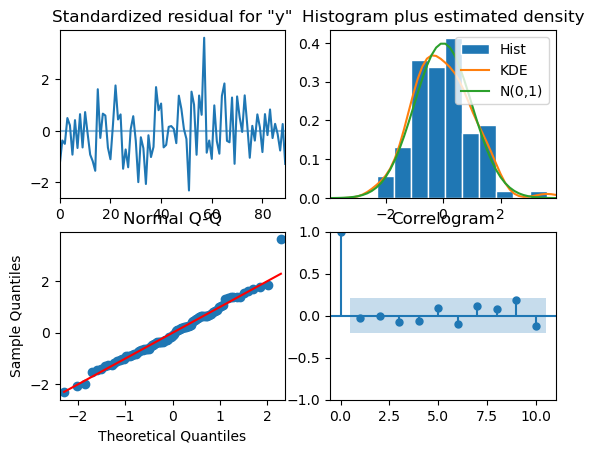

In [356]:
results_auto_SARIMA_rose.plot_diagnostics()
plt.show()

Predict on the Test Set using this model and evaluate the model.

In [357]:
predicted_auto_SARIMA = results_auto_SARIMA_rose.get_forecast(steps=len(test['Rose']))

In [358]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,96.954967,14.385665,68.759581,125.150352
1,131.683793,14.488403,103.287044,160.080541
2,43.974282,14.489707,15.574978,72.373586
3,62.229117,14.493935,33.821526,90.636707
4,66.783501,14.495744,38.372364,95.194638


In [359]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

15.433926372653481


In [362]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0, 1, 2)*(2, 1, 2, 12)'])

resultsDf

,Test RMSE
"SARIMA(0, 1, 2)*(2, 1, 2, 12)",15.433926


In [373]:
# Extract the predicted and true values of our time series
rose_forecasted = predicted_auto_SARIMA.predicted_mean
SARIMA_test['rose_forecasted'] = predicted_auto_SARIMA.predicted_mean
SARIMA_test.head()

,Rose,rose_forecasted
YearMonth,,
1990-11-01,110.0,96.954967
1990-12-01,132.0,131.683793
1991-01-01,54.0,43.974282
1991-02-01,55.0,62.229117
1991-03-01,66.0,66.783501


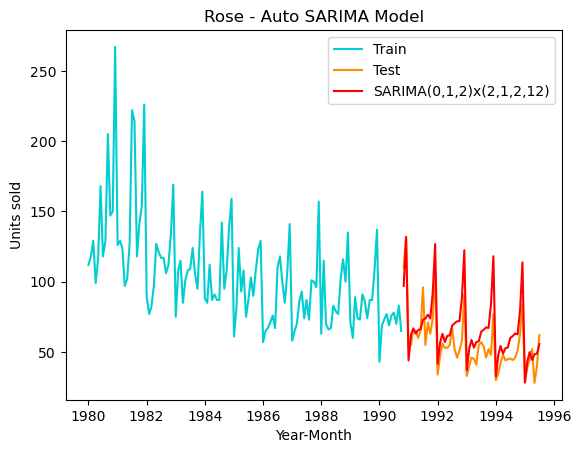

In [376]:
plt.plot(SARIMA_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(SARIMA_test['Rose'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['rose_forecasted'], color='red', label='SARIMA(0,1,2)x(2,1,2,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA Model')
plt.legend(loc='best');

Actionable Insights & Recommendations
- Conclude with the key takeaways (actionable insights and recommendations) for the business

Based on the results, Triple exponential smoorthing has lower RMSE of 9.130000 (Alpha=0.1,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing)

In [389]:
Full_model_TES_rose = ExponentialSmoothing(test['Rose'],trend='additive',seasonal='multiplicative')
Full_model_TES_rose_fit = Full_model_TES_rose.fit(smoothing_level=0.1,smoothing_trend=1.0,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_rose_forecast = Full_model_TES_rose_fit.forecast(steps=12)

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [390]:
rmse_rose_tes_full = metrics.mean_squared_error(test['Rose'],Full_model_TES_rose_fit.fittedvalues,squared=False)
print("For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is %3.3f" %(rmse_rose_tes_full))

For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is 6.725


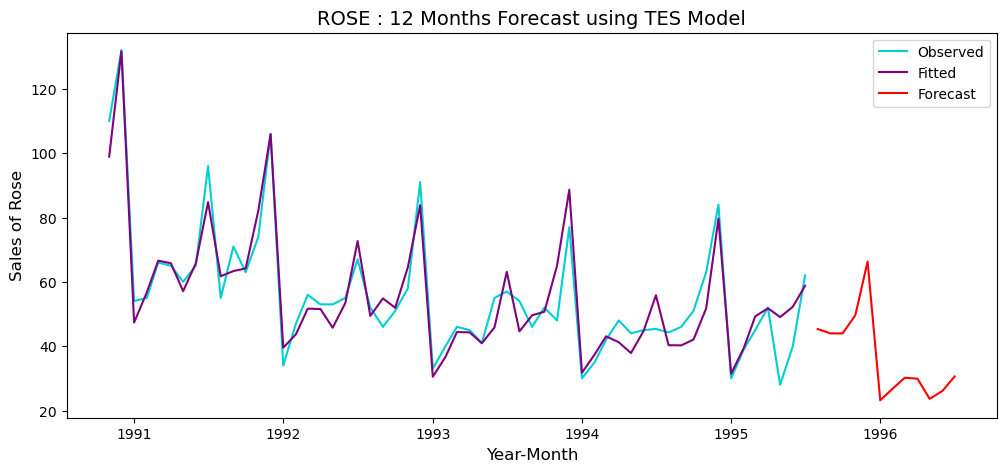

In [391]:
plt.figure(figsize=(12,5))

plt.plot(test['Rose'], label='Observed', color = 'darkturquoise')
plt.plot(Full_model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_rose_forecast, label='Forecast', color = 'red')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

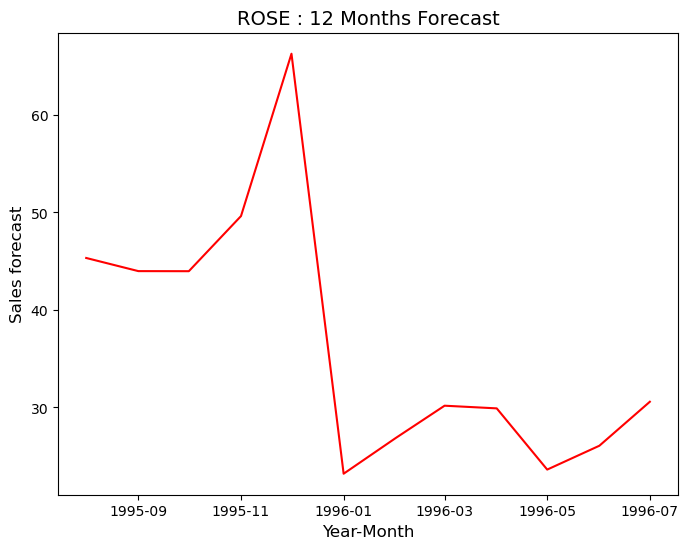

In [392]:
plt.figure(figsize=(8,6))
plt.plot(TES_rose_forecast, label='Forecast', color = 'red')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12 Months Forecast', fontsize=14);

In [393]:
TES_rose_forecast.describe()


count    12.000000
mean     36.636415
std      13.181135
min      23.202954
25%      26.670772
50%      30.381838
75%      44.319365
max      66.279325
dtype: float64

There is a declining trend in the forecaseted dataset, and the maximum sales forecast is expected to be 66 units.